# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | okha
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | muikamachi
Processing Record 12 of Set 1 | mpraeso
Processing Record 13 of Set 1 | egilsstadir
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | eraan
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | vrangel'
Processing Record 18 of Set 1 | san luis
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | ilagan
Processing Record 21 of Set 1 | avarua
Proc

Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | argo
Processing Record 43 of Set 4 | noumea
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | yakeshi
Processing Record 46 of Set 4 | pitimbu
Processing Record 47 of Set 4 | midvagur
Processing Record 48 of Set 4 | haimen
Processing Record 49 of Set 4 | usinsk
Processing Record 0 of Set 5 | blackmans bay
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | strelka
Processing Record 3 of Set 5 | punta arenas
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | yuzhno-kurilsk
Processing Record 7 of Set 5 | nizhneangarsk
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | mugia
Processing Record 10 of Set 5 | olonkinbyen
Processing Record 11 of Set 5 | mili
Processing Record 12 of Set 5 | taoudenni
Processing Record 13 of Set 5 | cole harbour
Processing Record 14 of Set 5 | bredasdorp
Processin

Processing Record 35 of Set 8 | toamasina
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | north shore
Processing Record 38 of Set 8 | mishkino
Processing Record 39 of Set 8 | xining
Processing Record 40 of Set 8 | svetlyy
Processing Record 41 of Set 8 | los frentones
Processing Record 42 of Set 8 | yelabuga
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | sergeyevka
Processing Record 45 of Set 8 | arkhangel'sk
Processing Record 46 of Set 8 | deqen
Processing Record 47 of Set 8 | taunggyi
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | sheregesh
Processing Record 0 of Set 9 | zamora
Processing Record 1 of Set 9 | sinop
Processing Record 2 of Set 9 | bafq
Processing Record 3 of Set 9 | konarka
Processing Record 4 of Set 9 | le vauclin
Processing Record 5 of Set 9 | lamas
Processing Record 6 of Set 9 | cam ranh
Processing Record 7 of Set 9 | oak ridge
Processing Record 8 of Set 9 | aldan
Processing Record 9 of Set 9

Processing Record 26 of Set 12 | gizo
Processing Record 27 of Set 12 | qarauyl
Processing Record 28 of Set 12 | civitavecchia
Processing Record 29 of Set 12 | kurtalan
Processing Record 30 of Set 12 | harstad
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | ungsang-nodongjagu
Processing Record 34 of Set 12 | viedma
Processing Record 35 of Set 12 | kuching
Processing Record 36 of Set 12 | puerto san jose
Processing Record 37 of Set 12 | james island
City not found. Skipping...
Processing Record 38 of Set 12 | shingu
Processing Record 39 of Set 12 | slave lake
Processing Record 40 of Set 12 | fenghuang
Processing Record 41 of Set 12 | khromtau
Processing Record 42 of Set 12 | kristinestad
Processing Record 43 of Set 12 | san bernardo del viento
Processing Record 44 of Set 12 | port augusta
Processing Record 45 of Set 12 | santiago del estero
Processing Record 46 of Set 12 | kafue
Processing Record 47 of Set 12 | k

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,28.32,73,99,1.59,GQ,1682631787
1,okha,53.5739,142.9478,-0.52,90,100,5.26,RU,1682631787
2,petropavlovsk-kamchatsky,53.0452,158.6483,2.33,52,20,2.00,RU,1682631787
3,bethel,41.3712,-73.4140,13.69,78,75,5.14,US,1682631787
4,waitangi,-43.9535,-176.5597,12.68,76,98,1.34,NZ,1682631787


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,28.32,73,99,1.59,GQ,1682631787
1,okha,53.5739,142.9478,-0.52,90,100,5.26,RU,1682631787
2,petropavlovsk-kamchatsky,53.0452,158.6483,2.33,52,20,2.00,RU,1682631787
3,bethel,41.3712,-73.4140,13.69,78,75,5.14,US,1682631787
4,waitangi,-43.9535,-176.5597,12.68,76,98,1.34,NZ,1682631787


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

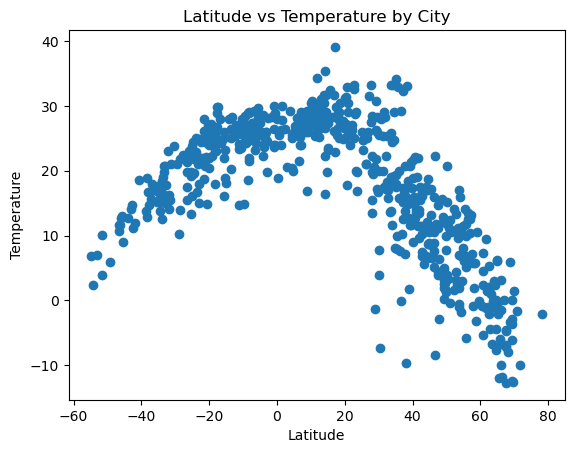

In [9]:
# Build scatter plot for latitude vs. temperature
xValTemp = city_data_df["Lat"]
yValTemp = city_data_df["Max Temp"]
tempScatter = plt.scatter(xValTemp, yValTemp)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature by City")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

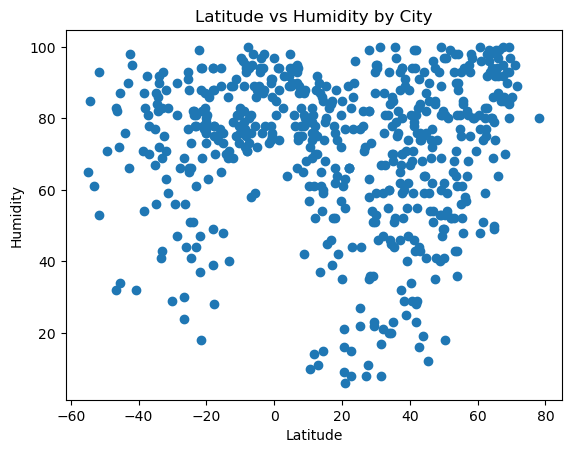

In [10]:
# Build the scatter plots for latitude vs. humidity
xValHumidity = city_data_df["Lat"]
yValHumidity = city_data_df["Humidity"]
tempScatter = plt.scatter(xValHumidity, yValHumidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity by City")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

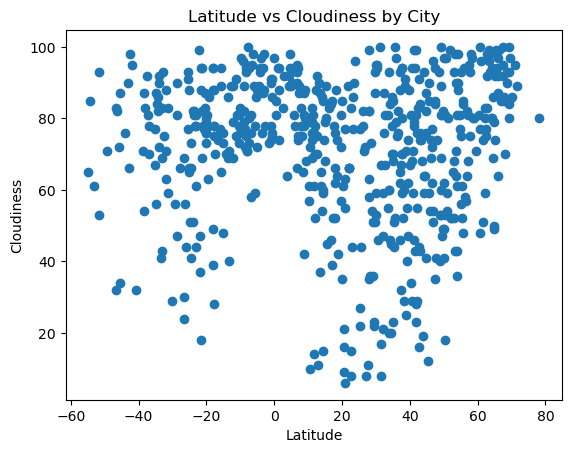

In [11]:
# Build the scatter plots for latitude vs. cloudiness
xValCloud = city_data_df["Lat"]
yValCloud = city_data_df["Cloudiness"]
tempScatter = plt.scatter(xValHumidity, yValHumidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness by City")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

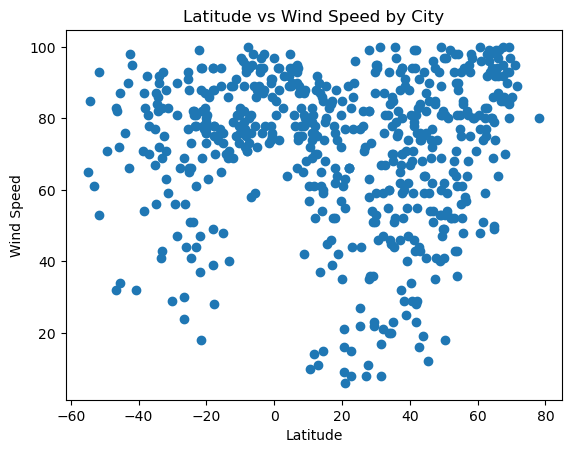

In [12]:
# Build the scatter plots for latitude vs. wind speed
xValSpeed = city_data_df["Lat"]
yValSpeed = city_data_df["Wind Speed"]
tempScatter = plt.scatter(xValHumidity, yValHumidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed by City")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linreg_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return (regress_values, slope, intercept, rvalue)


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame()

for index, city in city_data_df.iterrows():
    if city["Lat"] >= 0:
        northern_hemi_df = northern_hemi_df.append(city)

# Display sample data
northern_hemi_df = northern_hemi_df.reset_index(drop=True)
northern_hemi_df.head()

C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(ci

C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(ci

C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\2014077962.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  northern_hemi_df = northern_hemi_df.append(ci

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okha,53.5739,142.9478,-0.52,90,100,5.26,RU,1682631787
1,petropavlovsk-kamchatsky,53.0452,158.6483,2.33,52,20,2.00,RU,1682631787
2,bethel,41.3712,-73.4140,13.69,78,75,5.14,US,1682631787
3,hawaiian paradise park,19.5933,-154.9731,27.73,72,40,6.17,US,1682631788
4,ribeira grande,38.5167,-28.7000,14.87,89,16,6.71,PT,1682631788


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame()

for index, city in city_data_df.iterrows():
    if city["Lat"] < 0:
        southern_hemi_df = northern_hemi_df.append(city)

# Display sample data
southern_hemi_df = southern_hemi_df.reset_index(drop=True)
southern_hemi_df.head()

C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(ci

C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(city)
C:\Users\ginav\AppData\Local\Temp\ipykernel_13476\1261554182.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  southern_hemi_df = northern_hemi_df.append(ci

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okha,53.5739,142.9478,-0.52,90,100,5.26,RU,1682631787
1,petropavlovsk-kamchatsky,53.0452,158.6483,2.33,52,20,2.00,RU,1682631787
2,bethel,41.3712,-73.4140,13.69,78,75,5.14,US,1682631787
3,hawaiian paradise park,19.5933,-154.9731,27.73,72,40,6.17,US,1682631788
4,ribeira grande,38.5167,-28.7000,14.87,89,16,6.71,PT,1682631788


###  Temperature vs. Latitude Linear Regression Plot

Text(1, 5, 'y = -0.51x + 34.22\nR-value = -0.84')

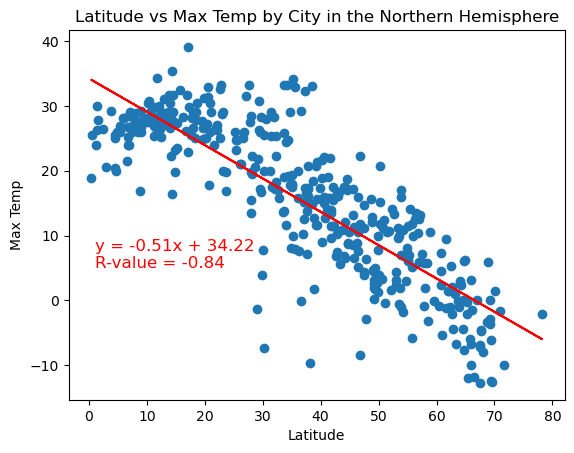

In [79]:
# Linear regression on Northern Hemisphere
x_north_temp = northern_hemi_df["Lat"]
y_north_temp = northern_hemi_df["Max Temp"]
northern_hemi_reg, slope, intercept, rvalue = linreg_function(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(x_north_temp, y_north_temp)
plt.plot(x_north_temp, northern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp by City in the Northern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 5))

Text(1, 5, 'y = -0.51x + 34.15\nR-value = -0.84')

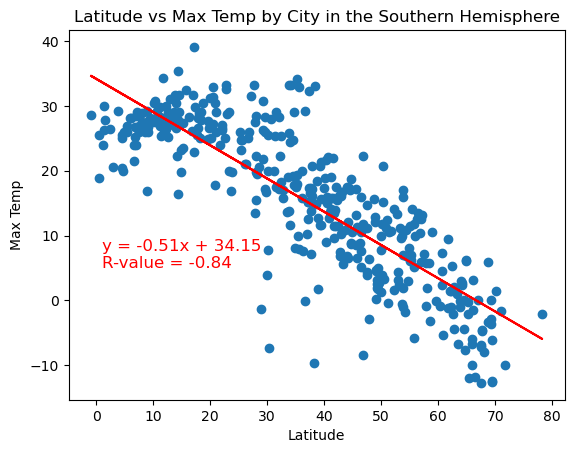

In [72]:
# Linear regression on Southern Hemisphere
x_south_temp = southern_hemi_df["Lat"]
y_south_temp = southern_hemi_df["Max Temp"]
southern_hemi_reg, slope, intercept, rvalue = linreg_function(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.scatter(x_south_temp, y_south_temp)
plt.plot(x_south_temp, southern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp by City in the Southern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 5))

**Discussion about the linear relationship:** The Latitude and Max temperatures of the Northern and Southern Hemisphere have a negative linear relationship. As the Latitude gets higher, the Max temperature gets lower, and vice versa. 

### Humidity vs. Latitude Linear Regression Plot

Text(1, 25, 'y = 0.15x + 63.93\nR-value = 0.13')

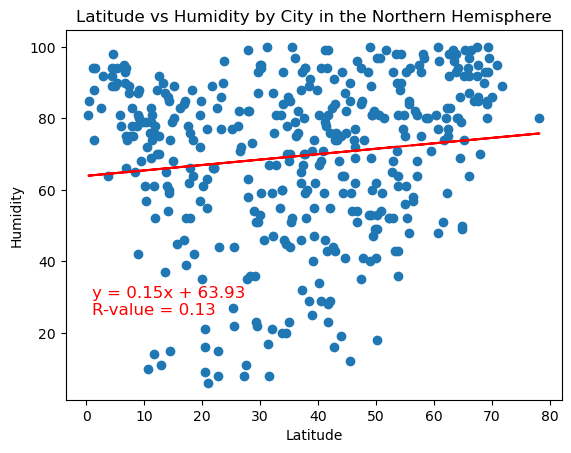

In [77]:
# Northern Hemisphere
x_north_hum = northern_hemi_df["Lat"]
y_north_hum = northern_hemi_df["Humidity"]
northern_hemi_reg, slope, intercept, rvalue = linreg_function(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(x_north_hum, y_north_hum)
plt.plot(x_north_hum, northern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity by City in the Northern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 25))


Text(1, 25, 'y = 0.15x + 64.05\nR-value = 0.13')

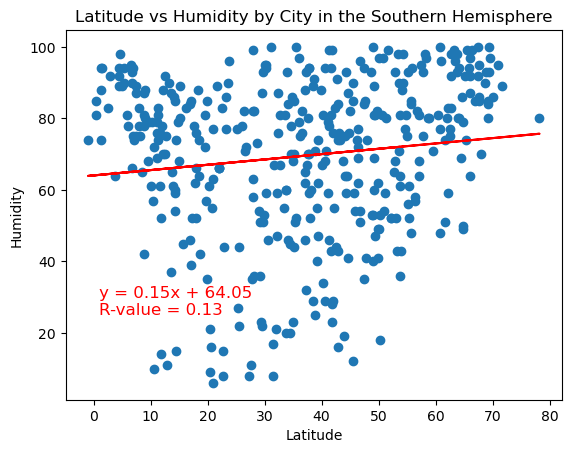

In [78]:
# Southern Hemisphere
x_south_hum = southern_hemi_df["Lat"]
y_south_hum = southern_hemi_df["Humidity"]
southern_hemi_reg, slope, intercept, rvalue = linreg_function(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.scatter(x_south_hum, y_south_hum)
plt.plot(x_south_hum, southern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity by City in the Southern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 25))

**Discussion about the linear relationship:** Humidity and Latitude in the Northern and Southern Hemispheres have a linear relationship. As latitude gets higher, so does the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

Text(1, 15, 'y = 0.04x + 52.63\nR-value = 0.02')

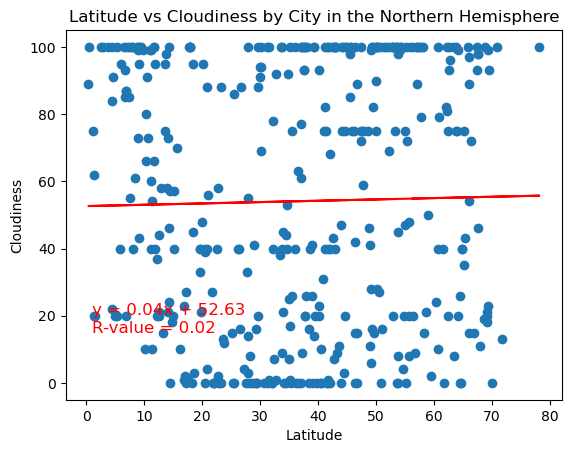

In [83]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df["Lat"]
y_north_cloud = northern_hemi_df["Cloudiness"]
northern_hemi_reg, slope, intercept, rvalue = linreg_function(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(x_north_cloud, y_north_cloud)
plt.plot(x_north_cloud, northern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness by City in the Northern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 15))

Text(1, 15, 'y = 0.05x + 52.24\nR-value = 0.02')

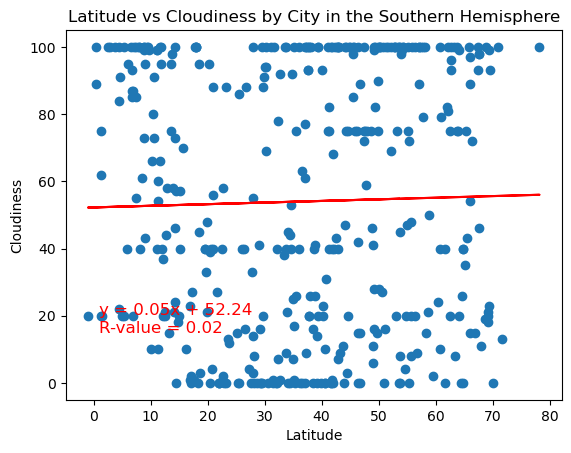

In [82]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df["Lat"]
y_south_cloud = southern_hemi_df["Cloudiness"]
southern_hemi_reg, slope, intercept, rvalue = linreg_function(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(x_south_cloud, y_south_cloud)
plt.plot(x_south_cloud, southern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness by City in the Southern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 15))

**Discussion about the linear relationship:** There is very little relationship between Latitude and Wind Speed in the Northern and Southern Hemispheres. The linear relationship is almost horizontal.

### Wind Speed vs. Latitude Linear Regression Plot

Text(1, 12, 'y = -0.0x + 3.53\nR-value = -0.01')

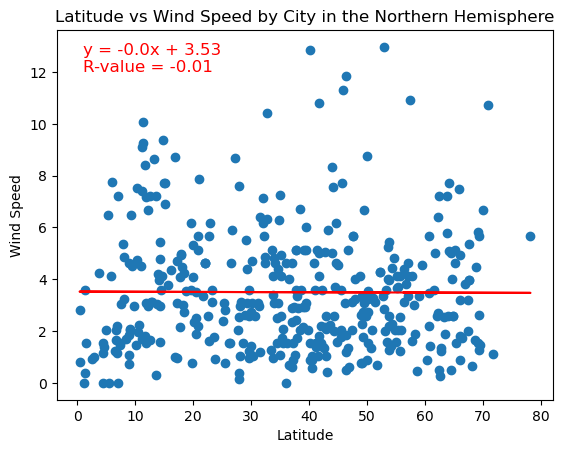

In [86]:
# Northern Hemisphere
x_north_speed = northern_hemi_df["Lat"]
y_north_speed = northern_hemi_df["Wind Speed"]
northern_hemi_reg, slope, intercept, rvalue = linreg_function(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(x_north_speed, y_north_speed)
plt.plot(x_north_speed, northern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed by City in the Northern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 12))

Text(1, 12, 'y = -0.0x + 3.52\nR-value = -0.0')

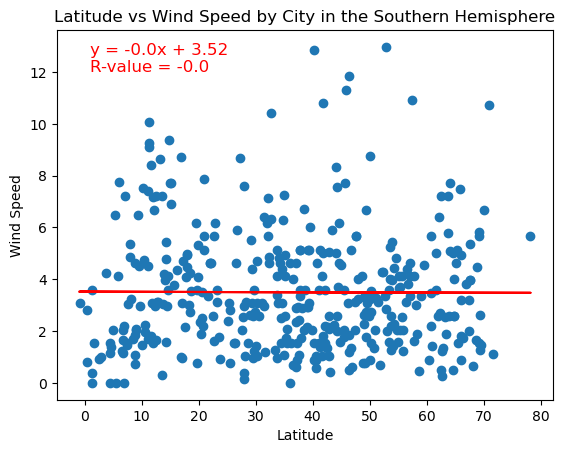

In [87]:
# Southern Hemisphere
x_south_speed = southern_hemi_df["Lat"]
y_south_speed = southern_hemi_df["Wind Speed"]
southern_hemi_reg, slope, intercept, rvalue = linreg_function(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(x_south_speed, y_south_speed)
plt.plot(x_south_speed, southern_hemi_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed by City in the Southern Hemisphere")

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}\nR-value = {round(rvalue,2)}"
plt.annotate(line_eq, fontsize=12, color="red", xy = (1, 12))

**Discussion about the linear relationship:** There is very little relationship between Latitude and Wind Speed in the Northern and Southern Hemispheres. The linear relationship is almost horizontal.